# 1. Write a function

In [1]:
# Function to process a string and return the most common word
function most_common_word(input::String)
    # Split the string on spaces
    words = split(input)

    # Remove punctuation and make the words lowercase
    clean_words = map(word -> lowercase(replace(word, r"[.,?!]" => "")), words)

    # Count the frequency of each word
    word_counts = Dict{String, Int}()
    for word in clean_words
        word_counts[word] = get(word_counts, word, 0) + 1
    end

    # Find the most common word
    most_common = findmax(word_counts)

    return most_common[2], most_common[1]  # Frequency and word
end

most_common_word (generic function with 1 method)

In [2]:
# Test the function
input = "I bought a sandwich with a side of chips!"
most_common = most_common_word(input)
println("Most common word: ", most_common[2])
println("Frequency: ", most_common[1])

Most common word: 2
Frequency: a


## Explanation of Differences with Python Code
1. Type Annotations:
Julia requires explicit type annotations in function definitions (e.g., input::String) Python doesn't use type annotations by default but supports them with typing.

2. String Processing:
Julia uses replace for replacing characters and a regex syntax different from Python's. Python might use .translate() or re.sub() for similar purposes.

3. Lowercasing:
Julia's lowercase is analogous to Python's .lower().

4. Dictionary Operations:
Julia's get function allows fetching a default value for keys, similar to Python's .get() method.

5. No Built-in Counter:
Unlike Python's collections.Counter, Julia requires manually counting word occurrences using dictionaries.

6. Return Values:
Julia uses tuples for multiple return values. Python uses tuples similarly, but Julia's syntax for unpacking might differ slightly.

# 2. Analyze a dataset

In [5]:
using Pkg
Pkg.add("LibPQ")
Pkg.add("DataFrames")
Pkg.add("Plots")

   Resolving package versions...
  No Changes to `C:\Users\Apits\.julia\environments\v1.11\Project.toml`
  No Changes to `C:\Users\Apits\.julia\environments\v1.11\Manifest.toml`
   Resolving package versions...
   Installed SentinelArrays ───── v1.4.7
   Installed PooledArrays ─────── v1.4.3
   Installed LaTeXStrings ─────── v1.4.0
   Installed InvertedIndices ──── v1.3.0
   Installed Reexport ─────────── v1.2.2
   Installed Crayons ──────────── v4.1.1
   Installed PrettyTables ─────── v2.4.0
   Installed DataFrames ───────── v1.7.0
   Installed Missings ─────────── v1.2.0
   Installed StringManipulation ─ v0.4.0
   Installed DataStructures ───── v0.18.20
   Installed Statistics ───────── v1.11.1
   Installed SortingAlgorithms ── v1.2.1
    Updating `C:\Users\Apits\.julia\environments\v1.11\Project.toml`
  [a93c6f00] + DataFrames v1.7.0
    Updating `C:\Users\Apits\.julia\environments\v1.11\Manifest.toml`
  [a8cc5b0e] + Crayons v4.1.1
  [a93c6f00] + DataFrames v1.7.0
  [864edb3b] + Dat

In [6]:
using LibPQ
using DataFrames
using Plots

In [7]:
# Connect to the database
conn = LibPQ.Connection("host=pg.mlds.northwestern.edu port=5432 dbname=everything2024 user=uds6227 password=DookDik009yay!")

# Query to retrieve the movie dataset
query = """
SELECT *
FROM mlds422.movies
"""
result = execute(conn, query)

# Convert the result to a DataFrame
movies_df = DataFrame(result)

Row,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
,Int32?,String?,String?,String?,String?,String?,Date?,Date?,Int32?,Int32?,Int32?,Int32?,Int32?
1,1,Percy Jackson & the Olympians: The Lightning Thief,A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods.,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,2010-02-12,2010-06-29,83,49,144,53,254287
2,2,Please Give,"Kate has a lot on her mind. There's the ethics problem of buying furniture on the cheap at estate sales and marking it up at her trendy Manhattan store. And how much markup can she get away with? There's the materialism problem of not wanting her teenage daughter to want the expensive things that Kate wants. There's the marriage problem of sharing a partnership in parenting, business and life with her husband Alex but sensing doubt nibbling at the foundations. And, there's Kate's free-floating 21st century malaise -- the problem of how to live well and be a good person when poverty, homelessness, and sadness are always right outside the door. Plus, there's the neighbors: cranky, elderly Andra and the two granddaughters who look after her.",R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90,86,140,64,11567
3,3,10,"Blake Edwards' 10 stars Dudley Moore as George, a Mancini-type songwriter. Approaching middle age, George feels as if life is passing him by, especially his sex life. Despite the presence of longtime lady friend Sam (Julie Andrews) in his life, he becomes obsessed from afar with Jenny (Bo Derek), who is engaged to be married. Following her to Mexico without her knowledge, George arranges a meeting with Jenny by saving the life of her fianc√©, David (Sam Jones). Once he has made her acquaintance, George suddenly finds himself faced with the realities of embarking on such an affair. Beyond renewing the popularity of Maurice Ravel's 'Bolero' and turning Bo Derek into a star, upon its release, 10 was one of the most financially successful Blake Edwards films in years. ~ Matthew Tobey, Rovi",R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118,68,22,53,14670
4,4,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, accused of knifing his father to death. The twelve jurors retire to the jury room, having been admonished that the defendant is innocent until proven guilty beyond a reasonable doubt. Eleven of the jurors vote for conviction, each for reasons of his own. The sole holdout is Juror #8, played by Henry Fonda. As Fonda persuades the weary jurors to re-examine the evidence, we learn the backstory of each man. Juror #3 (Lee J. Cobb), a bullying self-made man, has estranged himself from his own son. Juror #7 (Jack Warden) has an ingrained mistrust of foreigners; so, to a lesser extent, does Juror #6 (Edward Binns). Jurors #10 (Ed Begley) and #11 (George Voskovec), so certain of the infallibility of the Law, assume that if the boy was arrested, he must be guilty. Juror #4 (E.G. Marshall) is an advocate of dispassionate deductive reasoning. Juror #5 (Jack Klugman), like the defendant a product of 'the streets,' hopes that his guilty vote will distance himself from his past. Juror #12 (Robert Webber), an advertising man, doesn't understand anything that he can't package and market. And Jurors #1 (Martin Balsam), #2 (John Fiedler) and #9 (Joseph Sweeney), anxious not to make waves, 'go with the flow.' The excruciatingly hot day drags into an even hotter night; still, Fonda chips away at the guilty verdict, insisting that his fellow jurors bear in mind those words 'reasonable doubt.' A pet project of Henry Fonda's, Twelve Angry Men was his only foray into film production; the actor's partner in this venture was Reginald Rose, who wrote the 1954 television play on which the film was based. Carried over from the 

In [21]:
using DataFrames

# Drop all rows with missing values in any column
movies_df = dropmissing(movies_df)

Row,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
,Int32,String,String,String,String,String,Date,Date,Int32,Int32,Int32,Int32,Int32
1,1,Percy Jackson & the Olympians: The Lightning Thief,A teenager discovers he's the descendant of a Greek god and sets out on an adventure to settle an on-going battle between the gods.,PG,"Action & Adventure, Comedy, Drama, Science Fiction & Fantasy",Chris Columbus,2010-02-12,2010-06-29,83,49,144,53,254287
2,2,Please Give,"Kate has a lot on her mind. There's the ethics problem of buying furniture on the cheap at estate sales and marking it up at her trendy Manhattan store. And how much markup can she get away with? There's the materialism problem of not wanting her teenage daughter to want the expensive things that Kate wants. There's the marriage problem of sharing a partnership in parenting, business and life with her husband Alex but sensing doubt nibbling at the foundations. And, there's Kate's free-floating 21st century malaise -- the problem of how to live well and be a good person when poverty, homelessness, and sadness are always right outside the door. Plus, there's the neighbors: cranky, elderly Andra and the two granddaughters who look after her.",R,Comedy,Nicole Holofcener,2010-04-30,2010-10-19,90,86,140,64,11567
3,3,10,"Blake Edwards' 10 stars Dudley Moore as George, a Mancini-type songwriter. Approaching middle age, George feels as if life is passing him by, especially his sex life. Despite the presence of longtime lady friend Sam (Julie Andrews) in his life, he becomes obsessed from afar with Jenny (Bo Derek), who is engaged to be married. Following her to Mexico without her knowledge, George arranges a meeting with Jenny by saving the life of her fianc√©, David (Sam Jones). Once he has made her acquaintance, George suddenly finds himself faced with the realities of embarking on such an affair. Beyond renewing the popularity of Maurice Ravel's 'Bolero' and turning Bo Derek into a star, upon its release, 10 was one of the most financially successful Blake Edwards films in years. ~ Matthew Tobey, Rovi",R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118,68,22,53,14670
4,5,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,000 Leagues Under the Sea represented the studio's costliest and most elaborate American-filmed effort to date. Kirk Douglas plays a trouble-shooting 19th century seaman, trying to discover why so many whaling ships have been disappearing of late. Teaming with scientist Paul Lukas and diver Peter Lorre, Douglas sets sail to investigate--and is promptly captured by the megalomaniac Captain Nemo (James Mason), who skippers a lavish, scientifically advanced submarine. The film's special effects, including a giant squid, were impressive enough in 1954 to win an Academy Award. ~ Hal Erickson, Rovi",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,2054-01-01,2003-05-20,127,89,27,74,68860
5,6,"10,000 B.C.","A young outcast from a primitive tribe is forced to defend his people from a brutal onslaught in Independence Day director Roland Emmerich's fast-paced period adventure. Despite the fact that he is low man on the totem pole in his tribe of fearless hunters, a brave young boy (Steven Strait) longs to win the heart of a beautiful princess (Camilla Belle) who is well above his station in life. When an overwhelming horde of powerful invaders forces the hunters into slavery and abducts the princess, the once-aimless boy suddenly finds his destiny taking an unexpected turn. Now, if he has any hope of saving his tribe from certain extinction, this young boy will have to fight for the future to his dying breath. ~ Jason Buchanan, Rovi",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109,8,148,37,411087
6,9,Charly (A Heartbeat Away),"Sam Roberts thinks he has all the answers: th

In [12]:
using Pkg
Pkg.add("Dates")

   Resolving package versions...
    Updating `C:\Users\Apits\.julia\environments\v1.11\Project.toml`
  [ade2ca70] + Dates v1.11.0
  No Changes to `C:\Users\Apits\.julia\environments\v1.11\Manifest.toml`


In [23]:
using Dates

# Filter for movies released before 2010, excluding missing values
movies_before_2010 = filter(row -> year(row[:in_theaters_date]) < 2010, movies_df)

Row,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
,Int32,String,String,String,String,String,Date,Date,Int32,Int32,Int32,Int32,Int32
1,3,10,"Blake Edwards' 10 stars Dudley Moore as George, a Mancini-type songwriter. Approaching middle age, George feels as if life is passing him by, especially his sex life. Despite the presence of longtime lady friend Sam (Julie Andrews) in his life, he becomes obsessed from afar with Jenny (Bo Derek), who is engaged to be married. Following her to Mexico without her knowledge, George arranges a meeting with Jenny by saving the life of her fianc√©, David (Sam Jones). Once he has made her acquaintance, George suddenly finds himself faced with the realities of embarking on such an affair. Beyond renewing the popularity of Maurice Ravel's 'Bolero' and turning Bo Derek into a star, upon its release, 10 was one of the most financially successful Blake Edwards films in years. ~ Matthew Tobey, Rovi",R,"Comedy, Romance",Blake Edwards,1979-10-05,1997-08-27,118,68,22,53,14670
2,6,"10,000 B.C.","A young outcast from a primitive tribe is forced to defend his people from a brutal onslaught in Independence Day director Roland Emmerich's fast-paced period adventure. Despite the fact that he is low man on the totem pole in his tribe of fearless hunters, a brave young boy (Steven Strait) longs to win the heart of a beautiful princess (Camilla Belle) who is well above his station in life. When an overwhelming horde of powerful invaders forces the hunters into slavery and abducts the princess, the once-aimless boy suddenly finds his destiny taking an unexpected turn. Now, if he has any hope of saving his tribe from certain extinction, this young boy will have to fight for the future to his dying breath. ~ Jason Buchanan, Rovi",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109,8,148,37,411087
3,9,Charly (A Heartbeat Away),"Sam Roberts thinks he has all the answers: the purpose of life, the meaning of love, the plan for a perfect future. Until Charly walks into his life.",PG,"Comedy, Drama, Romance",Adam Thomas Anderegg,2002-09-27,2003-08-01,103,20,10,87,4819
4,19,The Adventures of Mark Twain,"Will Vinton, the stop-motion animation whiz who brought us The California Raisins, is the principal creative force behind The Adventures of Mark Twain. A clay-model Twain, voiced by James Whitmore, sets out in a hot-air balloon to find Halley's Comet. Joining the waspish humorist on his journey are some of his favorite creations, including Tom Sawyer, Becky Thatcher and Huckleberry Finn. As the balloon ascends further into the sky, we are treated to animated dramatization of such Twain classics as 'The Celebrated Jumping Frog of Calaveras County.' Though brilliantly conceived and executed, Adventures of Mark Twain might have been even more effective had it been shortened by ten minutes or so.",G,"Action & Adventure, Animation, Kids & Family",Will Vinton,1985-03-01,2006-01-31,86,80,5,82,1042
5,11,Dark Water,"Following up on his horror smash hits Ringu and Ringu 2, Hideo Nakata directs this supernatural psychological drama about a middle aged woman struggling to cling to her sanity. Yoshimi Matsubara (Hitomi Kuroki) is the midst of a nasty divorce with her thuggish, abusive husband over the custody of their five year old daughter Ikuko (Rio Kanno). In Japan's family court system, which is heavily weighted towards the mother, Yoshimi case would normally be a piece of cake. Unfortunately, Yoshimi has a history of mental imbalance as a result of her miserable, emotionally starved childhood. The transition from housewife to independent working woman has been stressful. She has moved into a fleabag of an apartment -- completely with a constantly leaking roof -- and has had little luck finding employment. Worse, Ikuko and then Yoshimi start seeing a creepy little girl dressed in y

In [25]:
using Statistics

# Calculate the average audience reviews before 2010
avg_reviews = mean(movies_before_2010[!, :audience_count])

326512.4983286908

In [26]:
# Filter for popular movies (more audience reviews than average)
popular_movies = filter(row -> row[:audience_count] > avg_reviews, movies_before_2010)

Row,movie_id,movie_title,movie_info,rating,genre,directors,in_theaters_date,on_streaming_date,runtime_in_minutes,critic_rating,critic_count,audience_rating,audience_count
,Int32,String,String,String,String,String,Date,Date,Int32,Int32,Int32,Int32,Int32
1,6,"10,000 B.C.","A young outcast from a primitive tribe is forced to defend his people from a brutal onslaught in Independence Day director Roland Emmerich's fast-paced period adventure. Despite the fact that he is low man on the totem pole in his tribe of fearless hunters, a brave young boy (Steven Strait) longs to win the heart of a beautiful princess (Camilla Belle) who is well above his station in life. When an overwhelming horde of powerful invaders forces the hunters into slavery and abducts the princess, the once-aimless boy suddenly finds his destiny taking an unexpected turn. Now, if he has any hope of saving his tribe from certain extinction, this young boy will have to fight for the future to his dying breath. ~ Jason Buchanan, Rovi",PG-13,"Action & Adventure, Classics, Drama",Roland Emmerich,2008-03-07,2008-06-24,109,8,148,37,411087
2,51,Aliens,"Big-budget special effects, swiftly paced action, and a distinct feminist subtext from writer/director James Cameron turned what should have been a by-the-numbers sci-fi sequel into both a blockbuster and a seven-time Oscar nominee. Sigourney Weaver returns as Ellen Ripley, the last surviving crew member of a corporate spaceship destroyed after an attack by a vicious, virtually unbeatable alien life form. Adrift in space for half a century, Ripley grapples with depression until she's informed by her company's representative, Carter Burke (Paul Reiser) that the planet where her crew discovered the alien has since been settled by colonists. Contact with the colony has suddenly been lost, and a detachment of colonial marines is being sent to investigate. Invited along as an advisor, Ripley predicts disaster, and sure enough, the aliens have infested the colony, leaving a sole survivor, the young girl Newt (Carrie Henn). With the soldiers picked off one by one, a final all-female showdown brews between the alien queen and Ripley, who's become a surrogate mother to Newt. Several future stars made early career appearances in Aliens (1986), including Lance Henriksen, Bill Paxton, and Reiser. ~ Karl Williams, Rovi",R,"Action & Adventure, Horror, Science Fiction & Fantasy",James Cameron,1986-07-18,1999-06-01,138,99,72,94,429158
3,85,The Happening,"The Happening' is a lightning-paced, heart-pounding paranoid thriller about a family on the run from an inexplicable and unstoppable event that threatens not only humankind, but the most basic human instinct of them all--survival.",R,"Drama, Mystery & Suspense, Science Fiction & Fantasy",M. Night Shyamalan,2008-06-11,2008-10-07,90,18,179,24,370131
4,144,The Box,"Norma and Arthur Lewis are a suburban couple with a young child who receive an anonymous gift bearing fatal and irrevocable consequences. A simple wooden box, it promises to deliver its owner $1 million with the press of a button. However, pressing this button will simultaneously cause the death of another human being somewhere in the world--someone they don't know. With just 24 hours to have the box in their possession, Norma and Arthur find themselves in the crosshairs of a startling moral dilemma and face the true nature of their humanity.",PG-13,"Horror, Mystery & Suspense, Science Fiction & Fantasy",Richard Kelly,2009-11-06,2010-02-23,116,44,155,24,359067
5,94,Disney's A Christmas Carol,"Ebenezer Scrooge begins the Christmas holiday with his usual miserly contempt, barking at his faithful clerk and his cheery nephew. But, when the ghosts of Christmas Past, Present and Yet to Come take him on an eye-opening journey revealing truths Old Scrooge is reluctant to face, he must open his heart to undo years of ill will before it's too late.",PG,"Animation, Drama, Kids & Family, Science Fiction & Fantasy",Robert Zemeckis,2009-11-06,20

In [27]:
# View the top rows and number of rows in the filtered data
println("Top rows of popular movies before 2010:")
println(first(popular_movies, 5))
println("Number of rows: ", nrow(popular_movies))

Top rows of popular movies before 2010:
5×13 DataFrame
 Row │ movie_id  movie_title                 movie_info                         rating  genre                              directors           in_theaters_date  on_streaming_date  runtime_in_minutes  critic_rating  critic_count  audience_rating  audience_count 
     │ Int32     String                      String                             String  String                             String              Date              Date               Int32               Int32          Int32         Int32            Int32          
─────┼───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
   1 │        6  10,000 B.C.                 A young outcast from a primitive…  PG-13   Action & Adventure, Classics, Dr…  Roland Emmerich     2008-03-07      

In [28]:
# Percent of movies by rating
rating_percentages = combine(groupby(popular_movies, :rating), nrow => :count)
rating_percentages[!, :percentage] .= rating_percentages[!, :count] ./ sum(rating_percentages[!, :count]) .* 100
println("Rating percentages:")
println(rating_percentages)

Rating percentages:
4×3 DataFrame
 Row │ rating  count  percentage 
     │ String  Int64  Float64    
─────┼───────────────────────────
   1 │ PG-13     331     43.5526
   2 │ R         231     30.3947
   3 │ PG        160     21.0526
   4 │ G          38      5.0


In [32]:
using Dates

# Engineer a new feature: audience_reviews_per_year
popular_movies[!, :audience_reviews_per_year] .= popular_movies[!, :audience_count] ./ (2010 .- year.(popular_movies[!, :in_theaters_date]))

# Summary table using the new feature
summary_table = combine(groupby(popular_movies, :rating), :audience_reviews_per_year => mean)
println("Summary table:")
println(summary_table)

Summary table:
4×2 DataFrame
 Row │ rating  audience_reviews_per_year_mean 
     │ String  Float64                        
─────┼────────────────────────────────────────
   1 │ PG-13                   598537.0
   2 │ R                            3.99671e5
   3 │ PG                           3.60616e5
   4 │ G                            2.17218e5


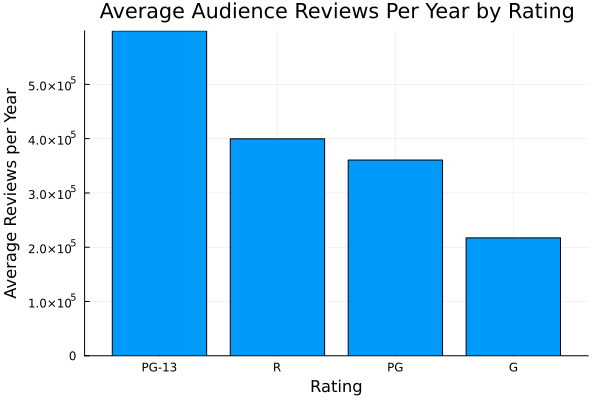

In [37]:
using Plots

# Visualization: Audience Reviews Per Year by Rating
p = bar(summary_table[!, :rating], summary_table[!, :audience_reviews_per_year_mean],
    title="Average Audience Reviews Per Year by Rating",
    xlabel="Rating", ylabel="Average Reviews per Year", legend=false)

# Display the plot
display(p)

## Differences with Python Code
1. Database Interaction:
Python typically uses pandas.read_sql() to load data directly into a DataFrame. Julia requires a separate query execution step.

2. DataFrames Syntax:
Julia’s DataFrames.jl uses filter and combine functions, whereas pandas uses indexing and chaining.

3. Broadcasting:
Julia uses .= for element-wise operations. Python doesn’t need this distinction; operations like df["col"] / scalar work out of the box.

4. Plotting:
Julia's plotting syntax is declarative, similar to Python's matplotlib but less verbose.

# 3. Explore an external library

In [39]:
import Pkg; Pkg.add("JSON3")

   Resolving package versions...
   Installed StructTypes ─ v1.11.0
   Installed JSON3 ─────── v1.14.1
    Updating `C:\Users\Apits\.julia\environments\v1.11\Project.toml`
  [0f8b85d8] + JSON3 v1.14.1
    Updating `C:\Users\Apits\.julia\environments\v1.11\Manifest.toml`
  [0f8b85d8] + JSON3 v1.14.1
  [856f2bd8] + StructTypes v1.11.0
Precompiling project...
   1187.7 ms  ✓ StructTypes
   9645.8 ms  ✓ JSON3
  2 dependencies successfully precompiled in 13 seconds. 229 already precompiled.


In [40]:
using JSON3

In [41]:
# Example JSON string
json_string = """
{
    "title": "Inception",
    "year": 2010,
    "rating": "PG-13",
    "genres": ["Action", "Sci-Fi", "Thriller"],
    "director": {
        "name": "Christopher Nolan",
        "age": 50
    }
}
"""

# Parse JSON string into a Julia dictionary
parsed_data = JSON3.read(json_string)

println("Parsed Data:")
println(parsed_data)

# Access specific values
println("Title: ", parsed_data["title"])
println("Director's Name: ", parsed_data["director"]["name"])

# Serialize a Julia object to a JSON string
julia_object = Dict("name" => "The Matrix", "year" => 1999, "rating" => "R")
json_output = JSON3.write(julia_object)

println("Serialized JSON:")
println(json_output)

Parsed Data:
{
      "title": "Inception",
       "year": 2010,
     "rating": "PG-13",
     "genres": [
                 "Action",
                 "Sci-Fi",
                 "Thriller"
               ],
   "director": {
                  "name": "Christopher Nolan",
                   "age": 50
               }
}
Title: Inception
Director's Name: Christopher Nolan
Serialized JSON:
{"name":"The Matrix","rating":"R","year":1999}


## How it works
1. Parsing JSON into a Julia dictionary:
* The JSON3.read(json_string) function parses a JSON string into a Julia dictionary.
* The JSON string is a representation of a JSON object, with keys and values (like a Python dictionary or a JavaScript object).
* The function JSON3.read() takes a JSON string as input and outputs a Julia dictionary (Dict), where the keys are strings and the values can be any Julia data type, such as strings, integers, arrays, or other dictionaries.
2. Accessing Specific Values:
Once the JSON string is parsed into a Julia dictionary, you can access specific elements using keys, just like accessing values in a Python dictionary
3. Serializing a Julia object to a JSON steing:
After manipulating or creating a Julia object (e.g., a Dict), you can serialize it back into a JSON string using JSON3.write()

## Differences from Python
1. Library:
In Julia, JSON parsing and serialization is typically handled by the JSON3 package, whereas in Python, this is done using the built-in json module.

2. Data Structures:
In both Julia and Python, after parsing JSON, the result is stored in a dictionary-like structure. However, the underlying data structures are different:
Python: JSON is parsed into a dict (dictionary).
Julia: JSON is parsed into a Dict (with the Dict type being case-sensitive).

3. Accessing Values:
Both Julia and Python use the [] syntax to access dictionary values. In Python, the dictionary object is indexed by keys (e.g., parsed_data["title"]), and the same applies in Julia.

4. Serialization:
Python: json.dumps() is used to serialize a Python dictionary to a JSON string.
Julia: JSON3.write() is used to serialize a Julia Dict into a JSON string.

5. JSON Parsing and Writing Syntax:
In Python, the built-in json library uses json.loads() for deserialization and json.dumps() for serialization. These functions operate with Python dictionaries directly.
In Julia, the JSON3 package provides the read() function for parsing JSON strings and write() for serializing Julia objects.

# 4. Compare data science programming languages

1. Python:
* Summary: Popular, easy-to-learn, used everywhere. Great for both beginners and professionals.
* Strengths: Many tools for data and AI (like Pandas and TensorFlow). Works well for all kinds of tasks, not just data science. Huge community and lots of learning resources.
* Weakness:	Slower for big calculations. Handles big data less efficiently than some other tools. Not as fast as Julia for heavy math problems.

2. R:
* Summary: Best for statistics and data visualization.	Great for researchers and statisticians.
* Strengths: Amazing for graphs and analyzing numbers (like ggplot2 and dplyr).	Makes complex stats calculations easy. Good for specific statistical tasks.
* Weakness:  Not great for machine learning or general coding tasks. Harder to learn if you don’t know stats. Slower and less flexible than Python for other tasks.

3. Julia:
* Summary: Fast, designed for math and data problems. Best for scientific computing and modeling.
* Strengths: Very fast for big calculations.	Built for parallel and advanced computing. Combines speed with simplicity for coding.
* Weakness: Fewer tools and libraries than Python and R. Smaller community and less support for general tasks. Takes time to learn if coming from Python or R.